In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pickle as pkl
tf.enable_eager_execution()

## Declare folder name

In [2]:
path = 'testing_LQR_GPU'

In [3]:
def load_metrics(loadpath):
    (losses,rewards,pq_losses,grad_norms,predicted_trajectories,
     actual_trajectories,look_ahead_predictions) = pkl.load(open('training_results/'+path+'/metrics.pkl','rb'))
    global_epoch = pkl.load(open('training_results/'+path+'/globalepoch.pkl','rb'))
    return(losses,rewards,pq_losses,grad_norms,predicted_trajectories,
     actual_trajectories,look_ahead_predictions),global_epoch

In [4]:
(losses,rewards,pq_losses,grad_norms,predicted_trajectories,
     actual_trajectories,look_ahead_predictions), global_epoch=load_metrics(path)

In [5]:
array_pq_losses = np.array(pq_losses).T
p50_1,p90_1,p50_2,p90_2,p50_3,p90_3,p50_4,p90_4 = np.mean(array_pq_losses[:,-100:], axis = 1)
last_100_av_loss_per_reward = np.mean([loss/reward for loss,reward in zip(losses[-100:],rewards[-100:])])

In [6]:
print('Last 100 episodes loss/reward: {}'.format(last_100_av_loss_per_reward))
print('p50 losses: Position: {} Velocity: {} Theta position: {} Theta velocity: {}'.format(p50_1,p50_2,p50_3,p50_4))
print('p90 losses: Position: {} Velocity: {} Theta position: {} Theta velocity: {}'.format(p90_1,p90_2,p90_3,p90_4))

Last 100 episodes loss/reward: 9.350110717528421
p50 losses: Position: 2.0663584522559845e-12 Velocity: 0.011407018788177738 Theta position: 0.7693410683444749 Theta velocity: 0.37863088496770314
p90 losses: Position: 2.626276254549473e-12 Velocity: 0.007319707275956123 Theta position: 0.7889090591932476 Theta velocity: 0.4480390408134432


for var in grad_norms:
    plt.figure(figsize=(20,6))
    plt.plot(var[1:])
    plt.yscale('log')
    plt.title(var[0])
    plt.show()

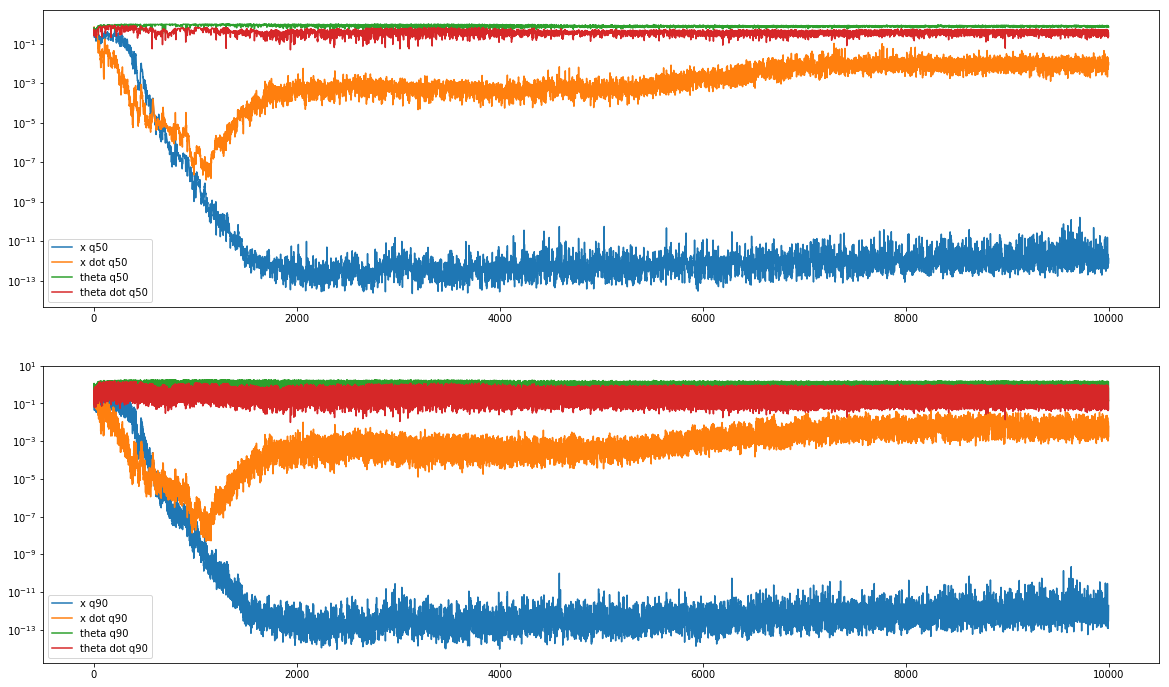

In [7]:
labels = ['x q50','x q90','x dot q50','x dot q90','theta q50','theta q90','theta dot q50','theta dot q90']
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (20,12))
for i in range(array_pq_losses.shape[0]):
    if i%2 == 0:
        ax1.plot(array_pq_losses[i], label = labels[i])
    else:
        ax2.plot(array_pq_losses[i], label = labels[i])
ax1.legend()
ax1.set_yscale('log')
# ax1.set_ylim(0.0,2.0)
ax2.legend()
ax2.set_yscale('log')
# ax2.set_ylim(0.0,2.0)
plt.show()

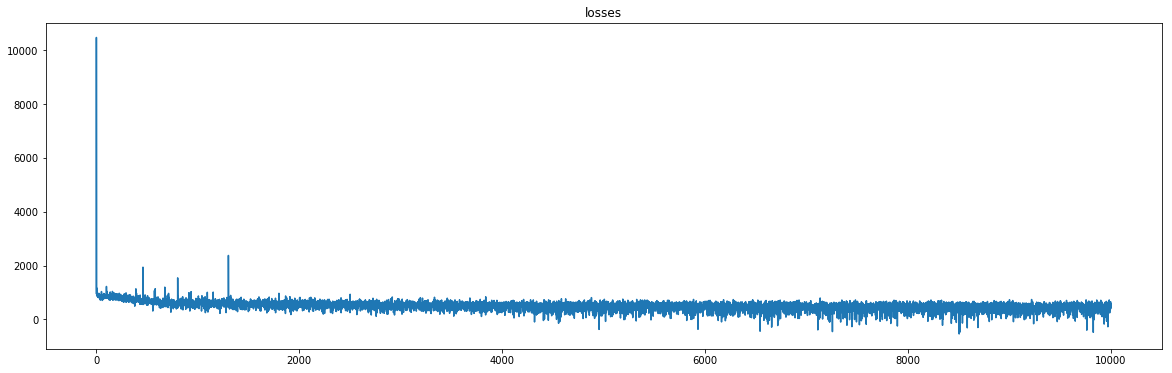

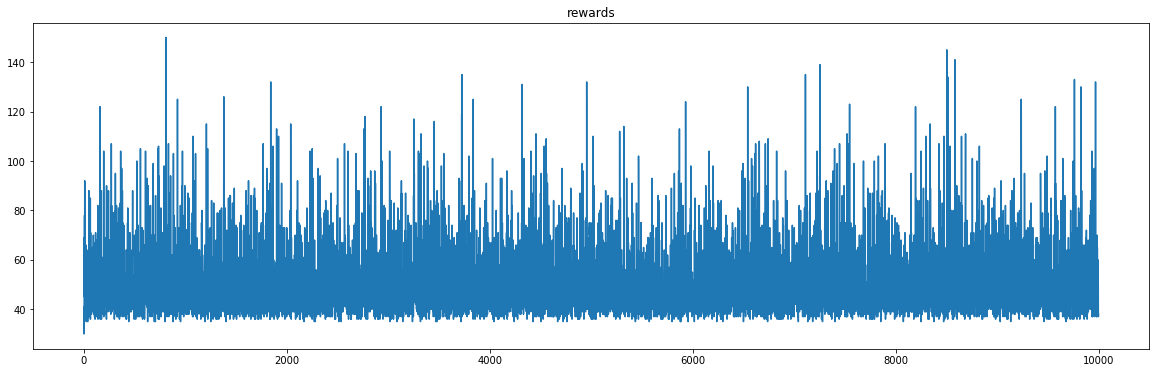

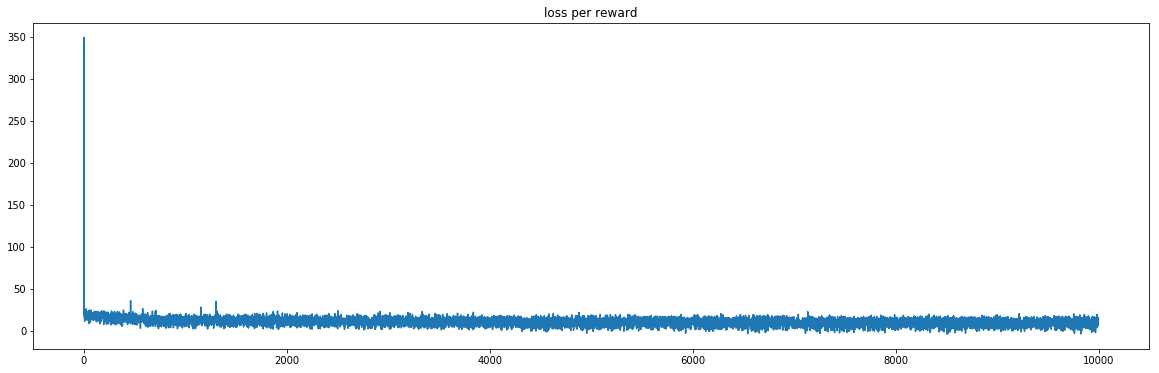

In [8]:
plt.figure(figsize=(20,6))
plt.plot(losses)
plt.title('losses')
plt.show()
plt.figure(figsize=(20,6))
plt.plot(rewards)
plt.title('rewards')
plt.show()
plt.figure(figsize=(20,6))
plt.plot([loss/reward for loss,reward in zip(losses,rewards)])
plt.title('loss per reward')
# plt.ylim(0,500)
plt.show()

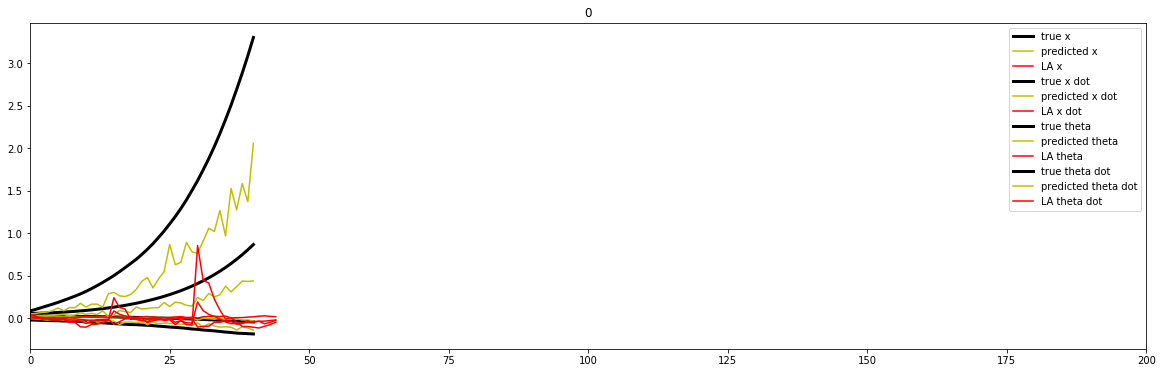

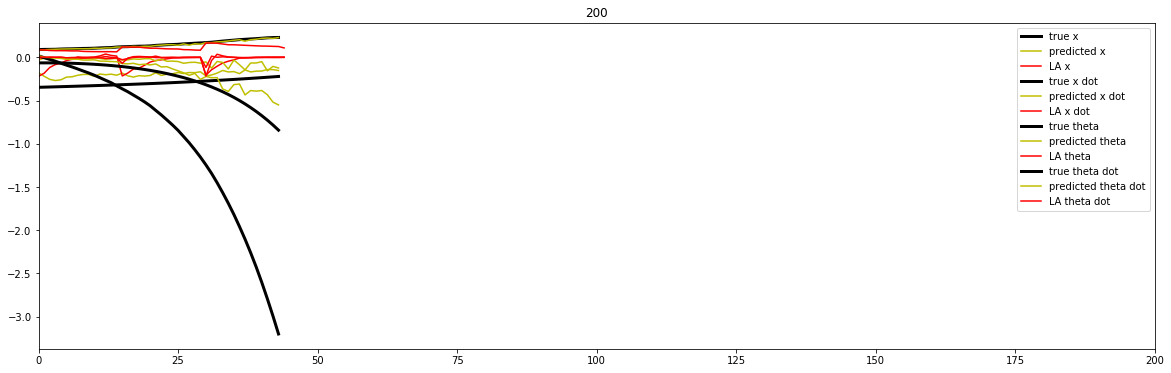

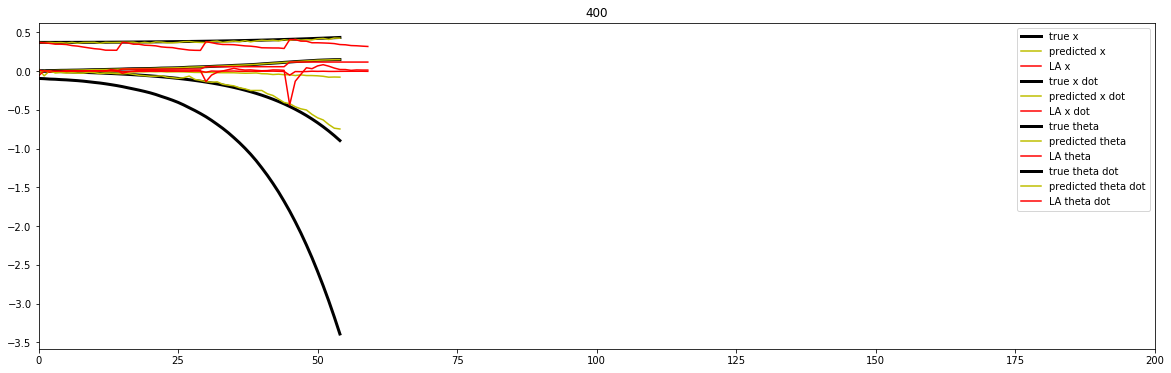

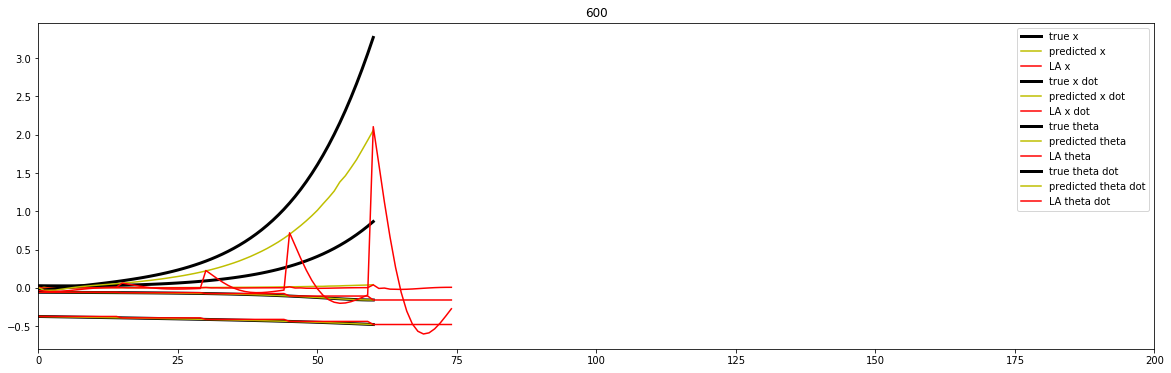

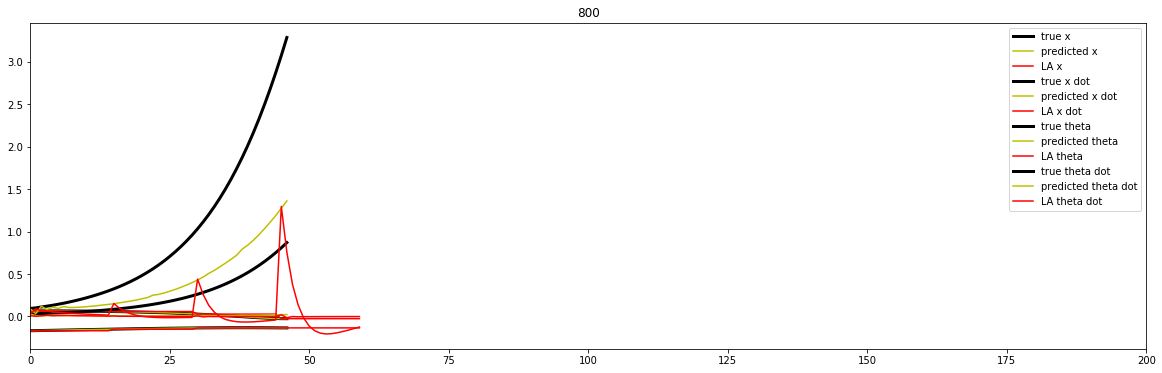

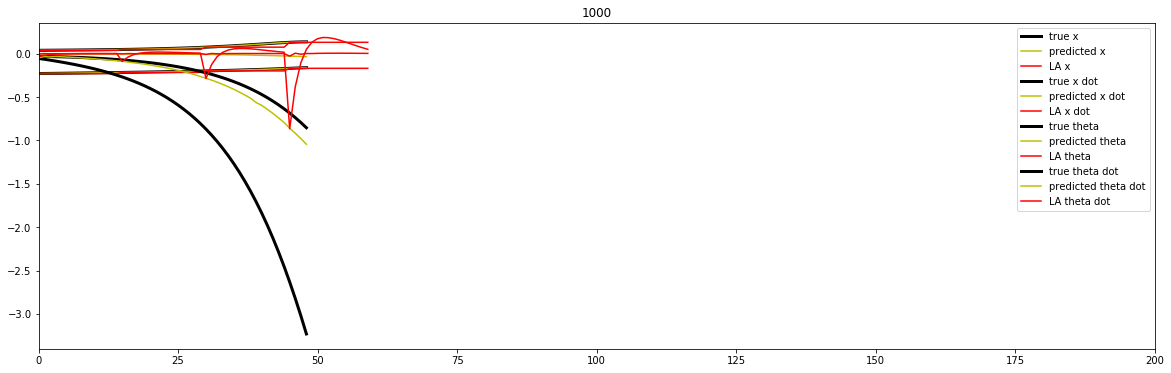

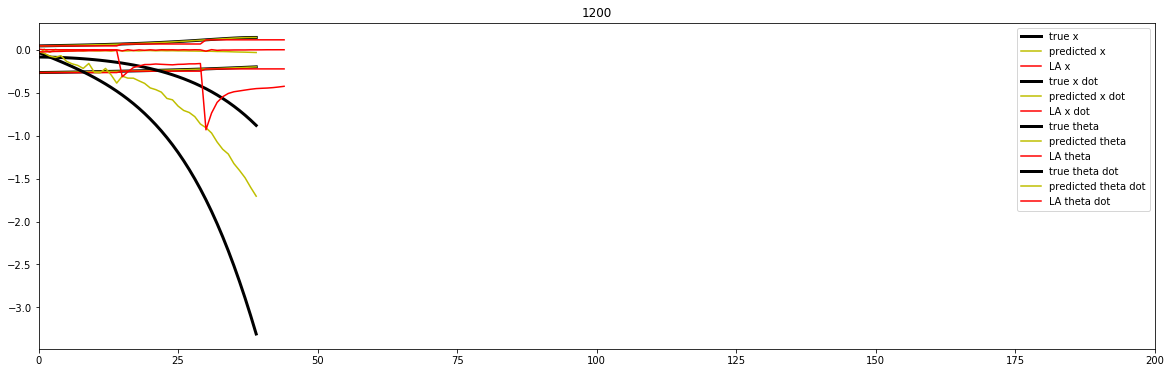

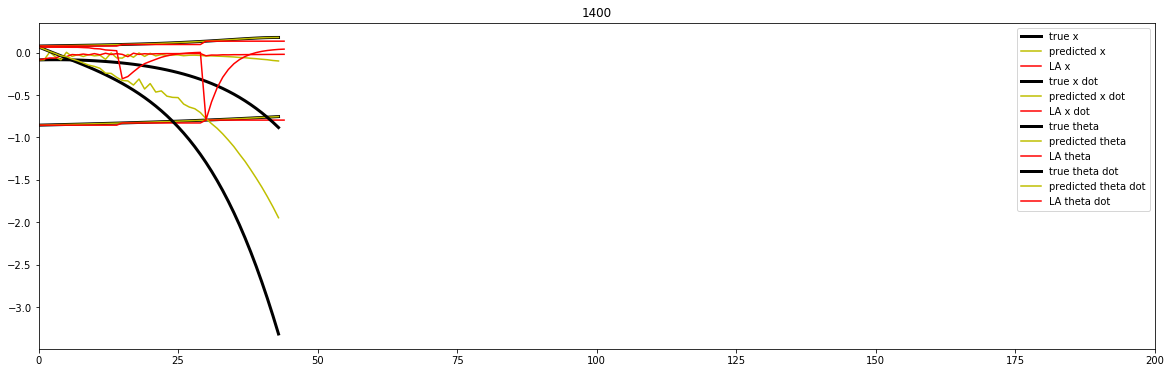

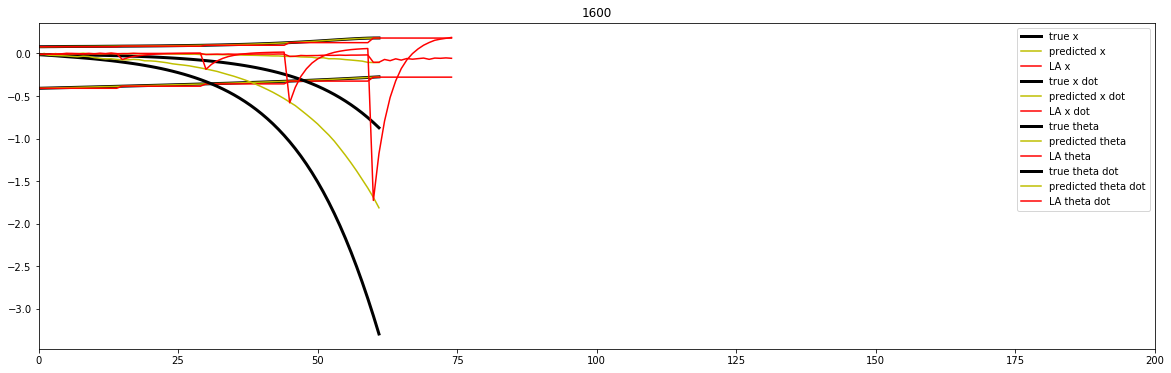

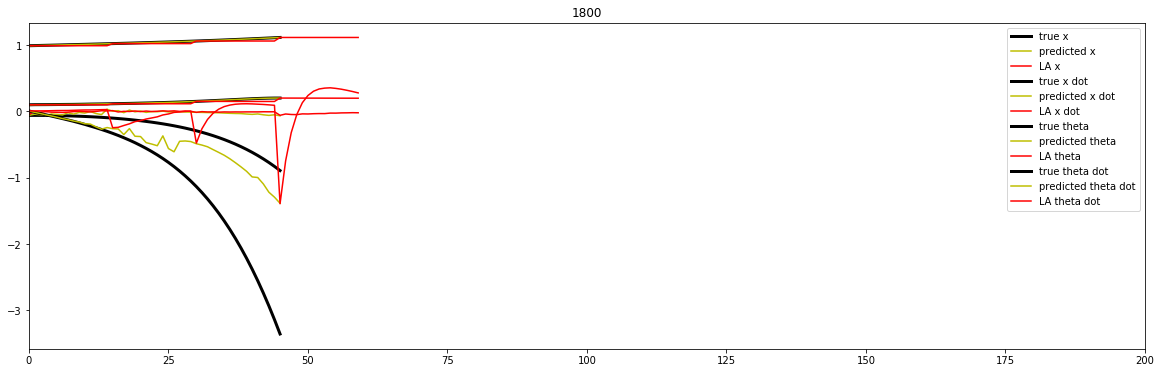

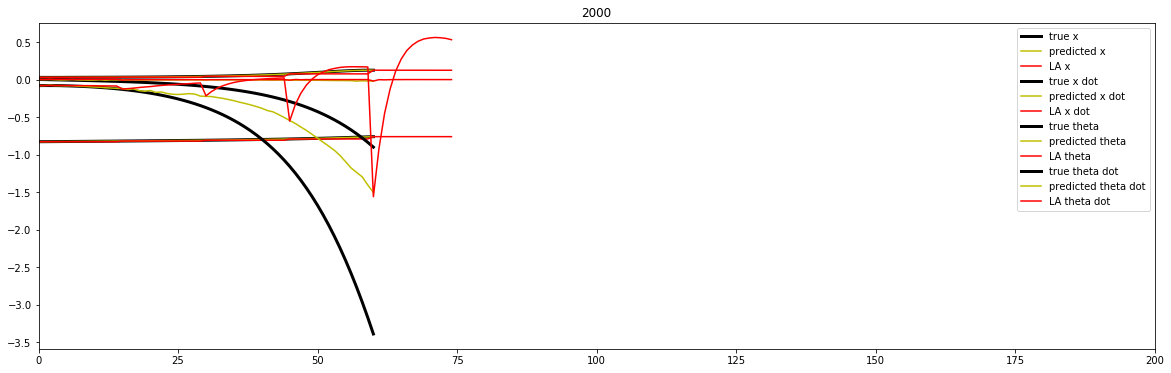

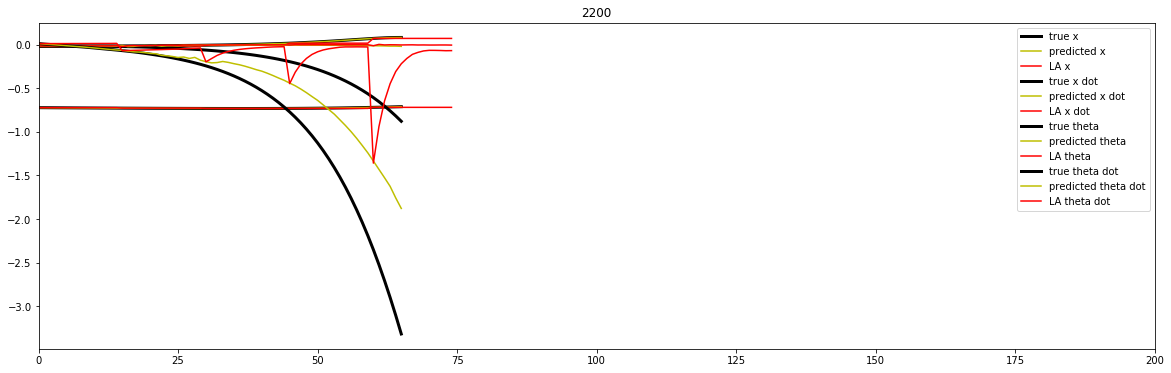

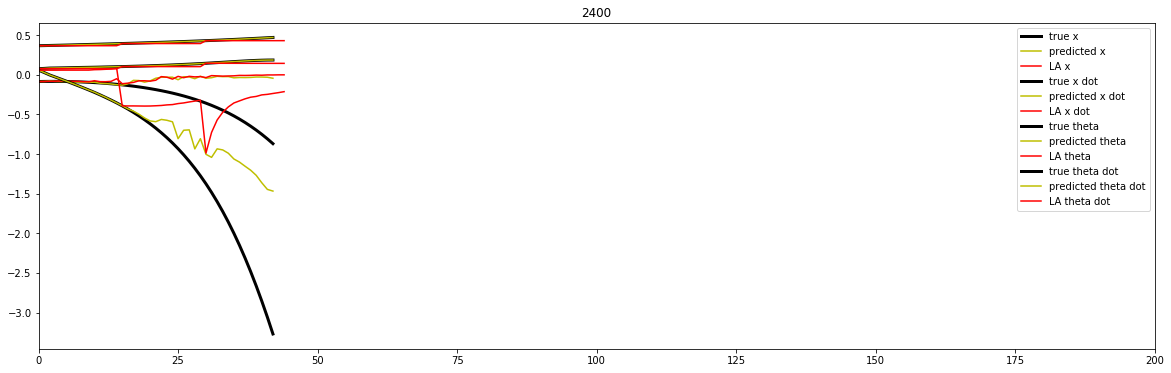

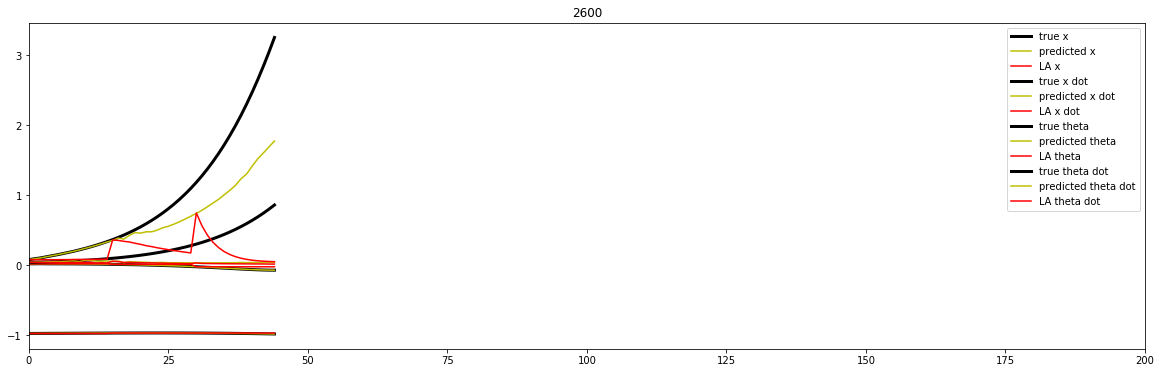

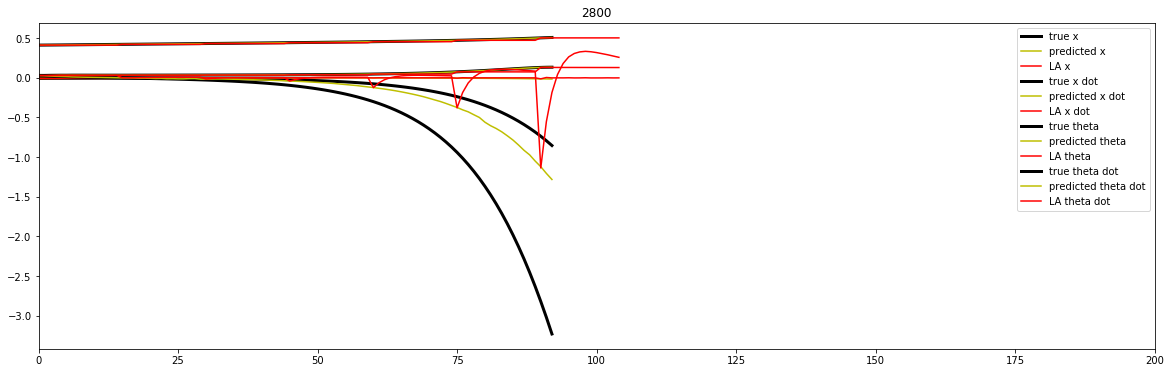

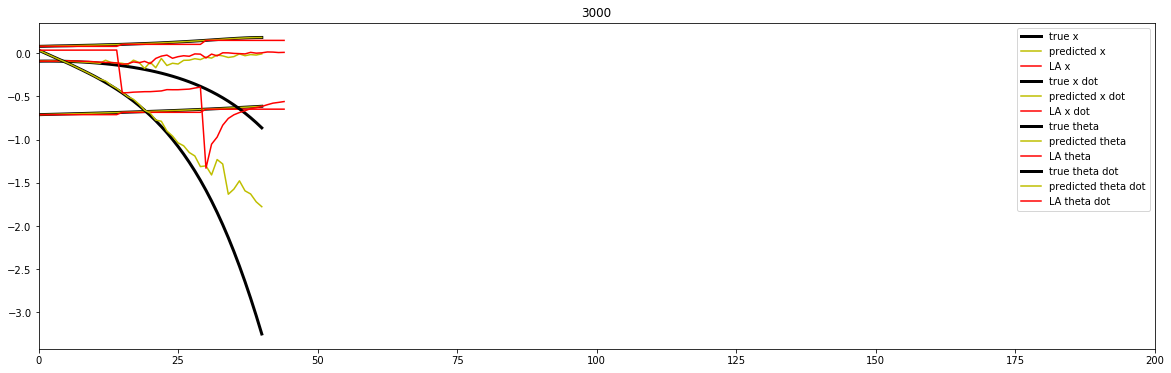

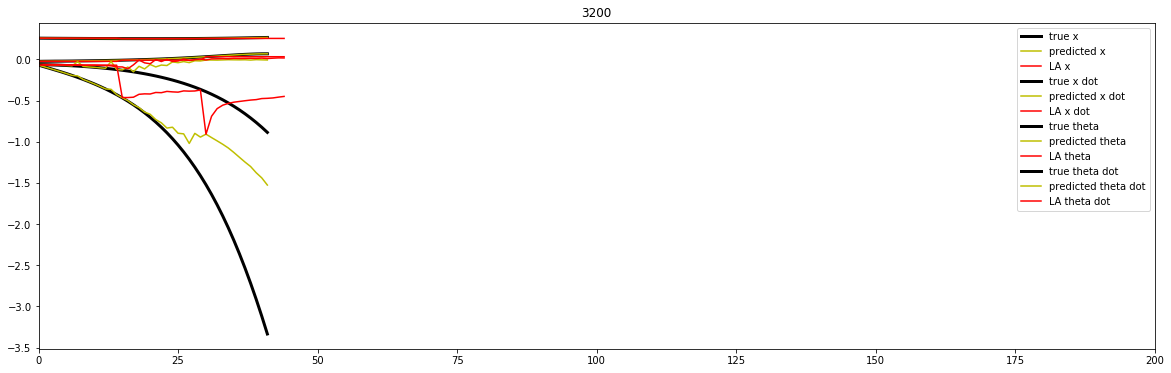

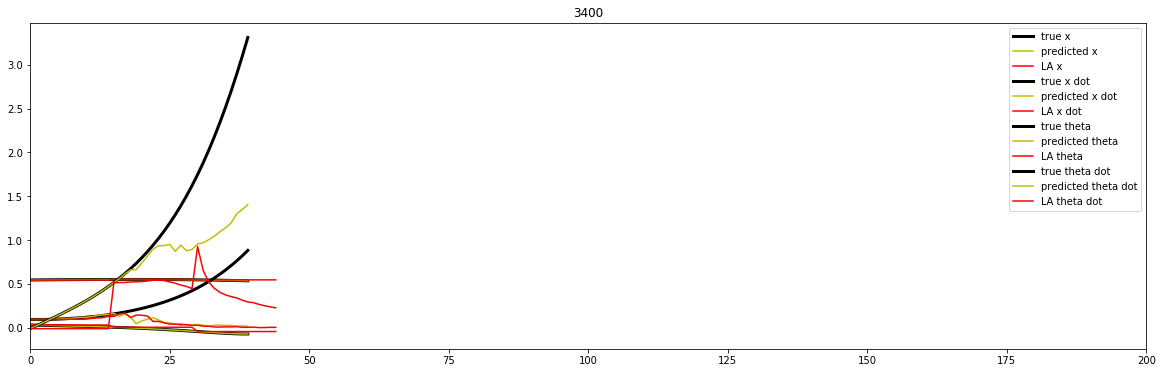

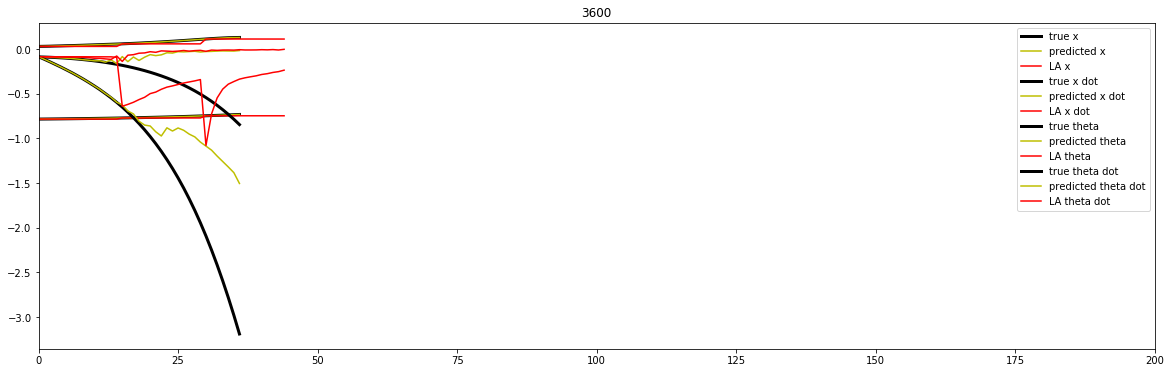

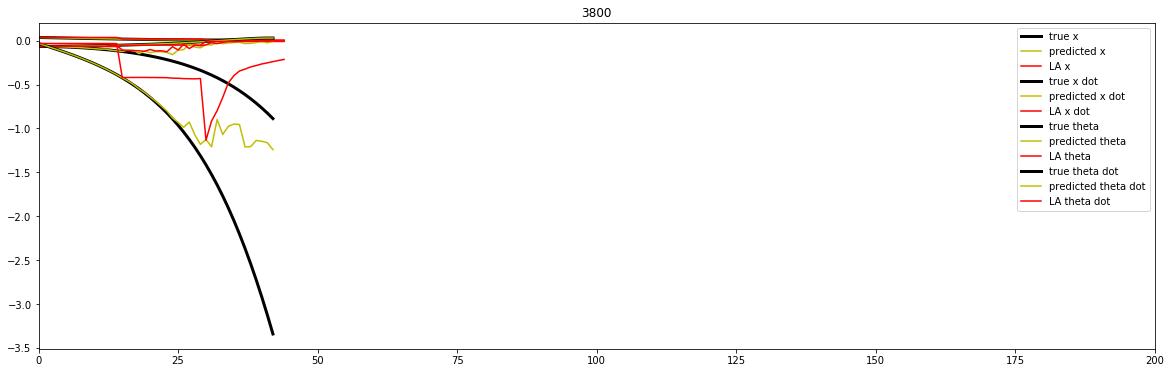

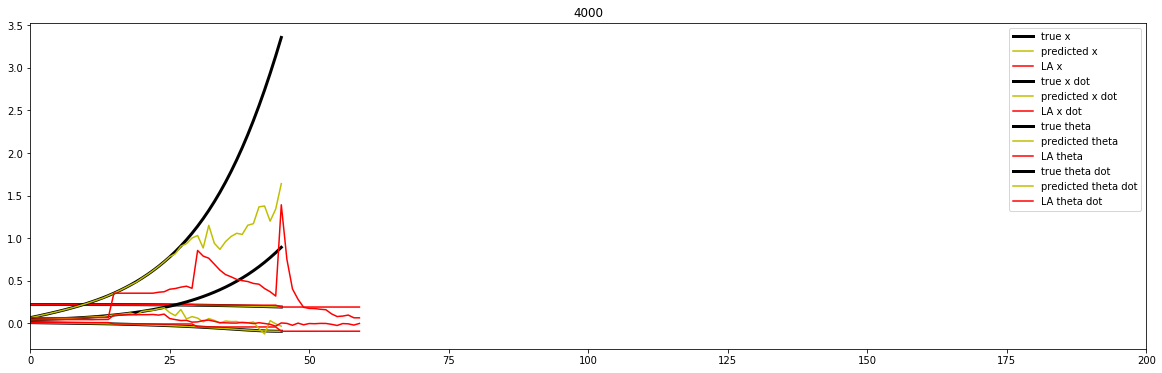

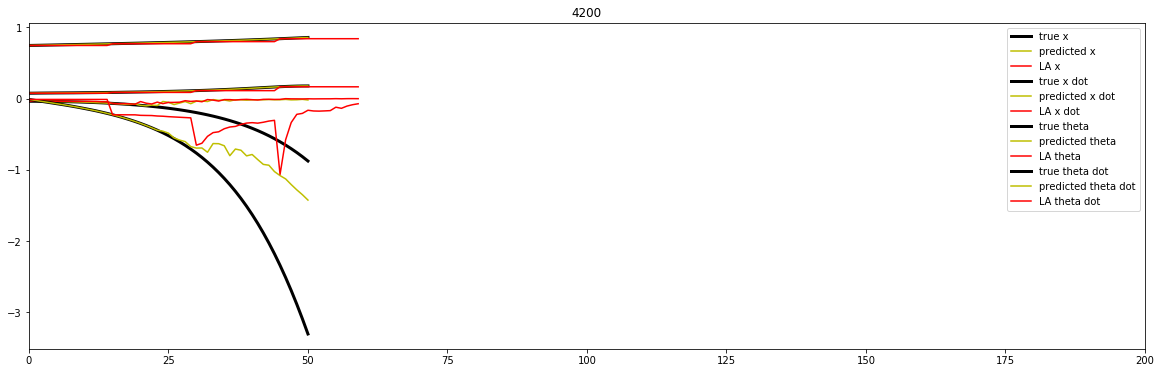

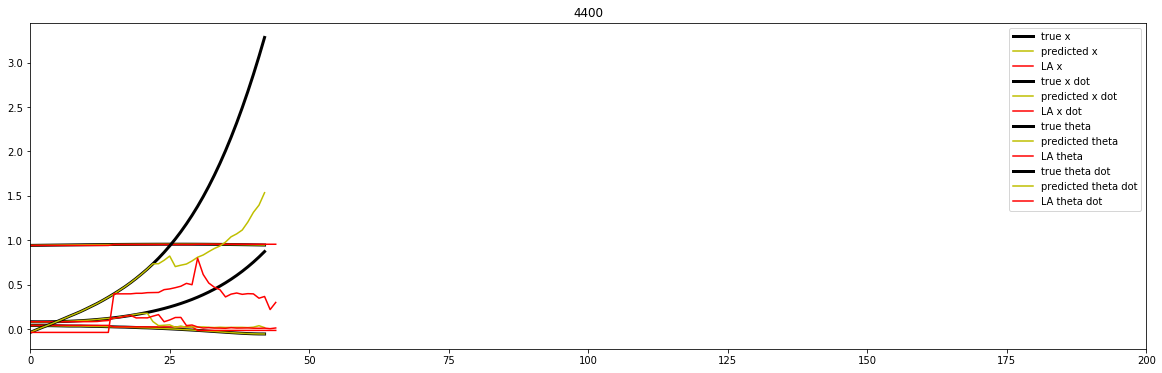

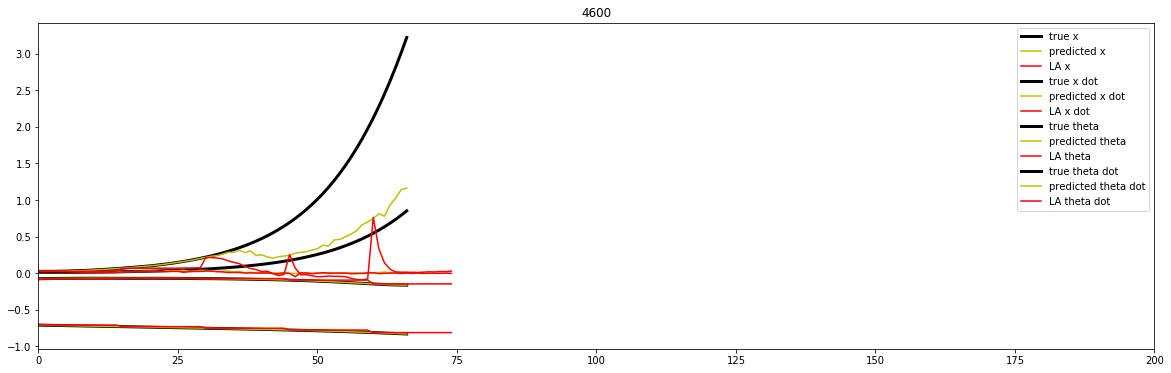

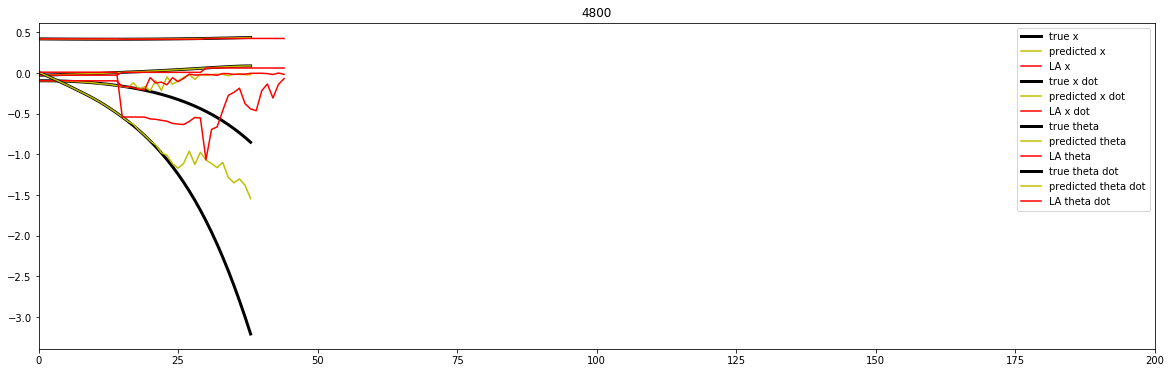

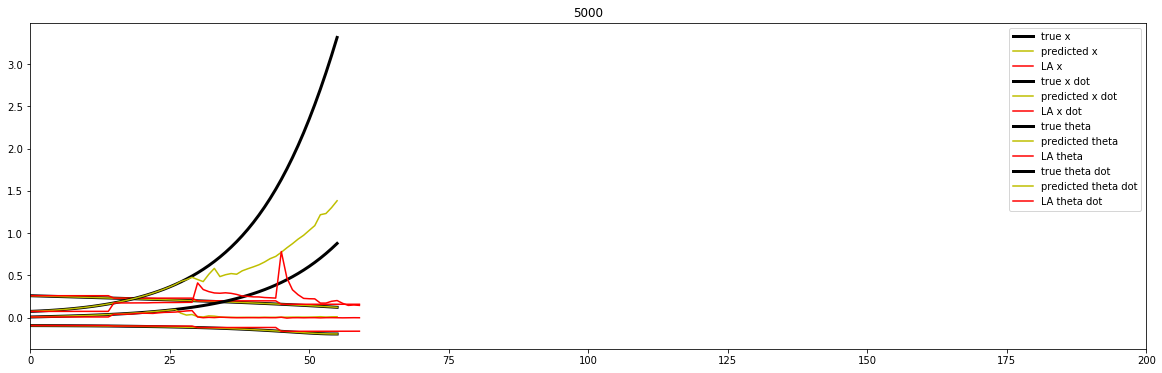

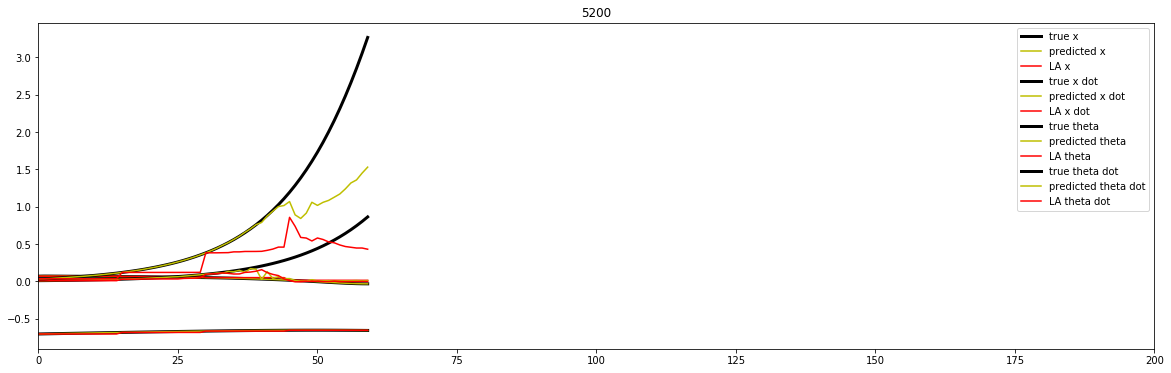

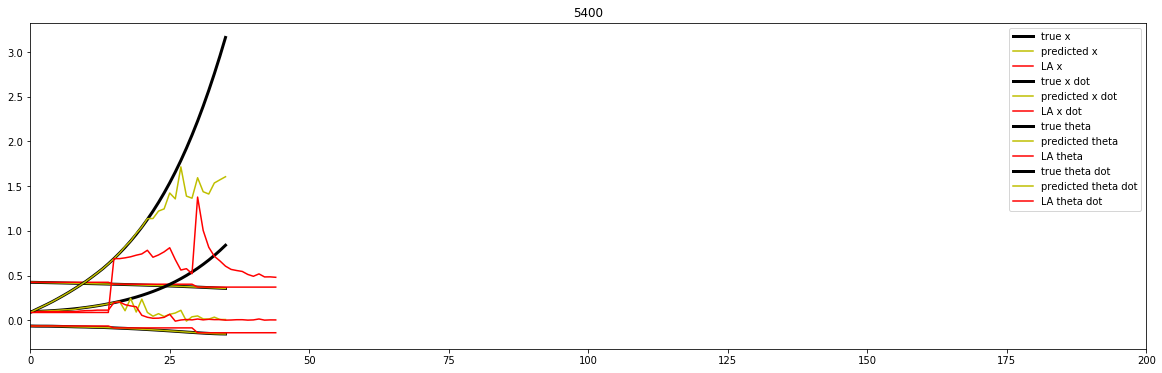

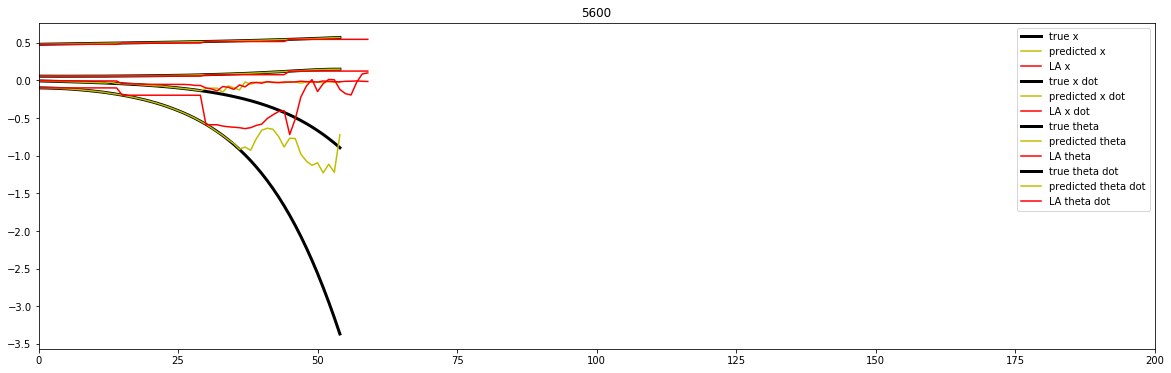

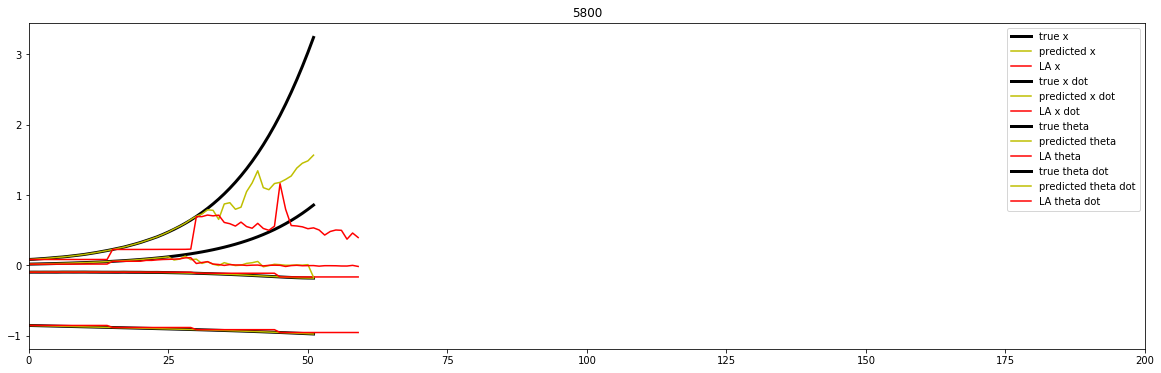

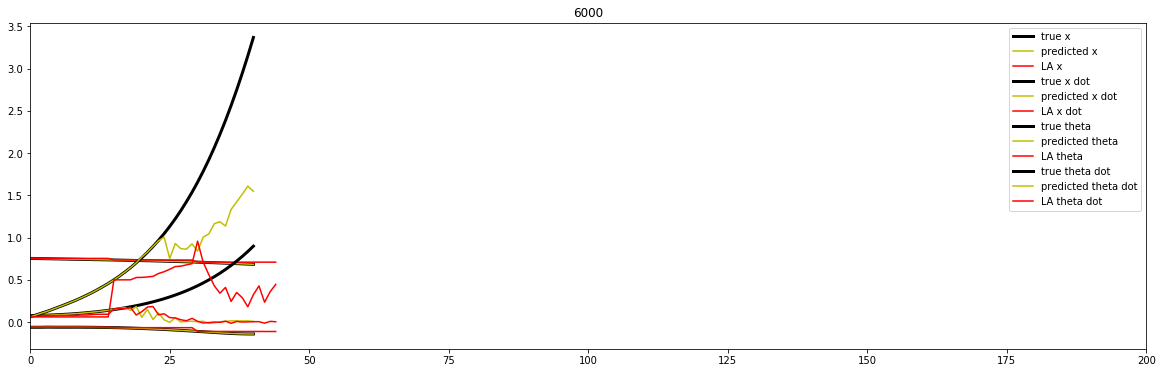

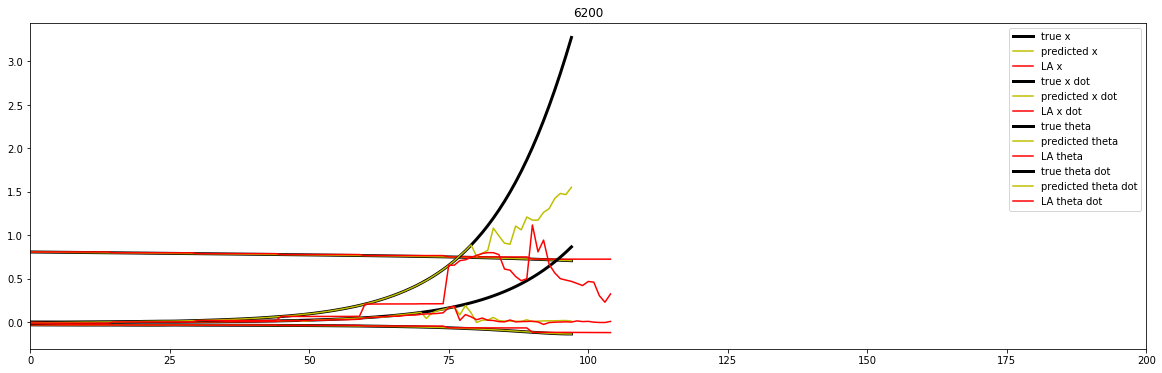

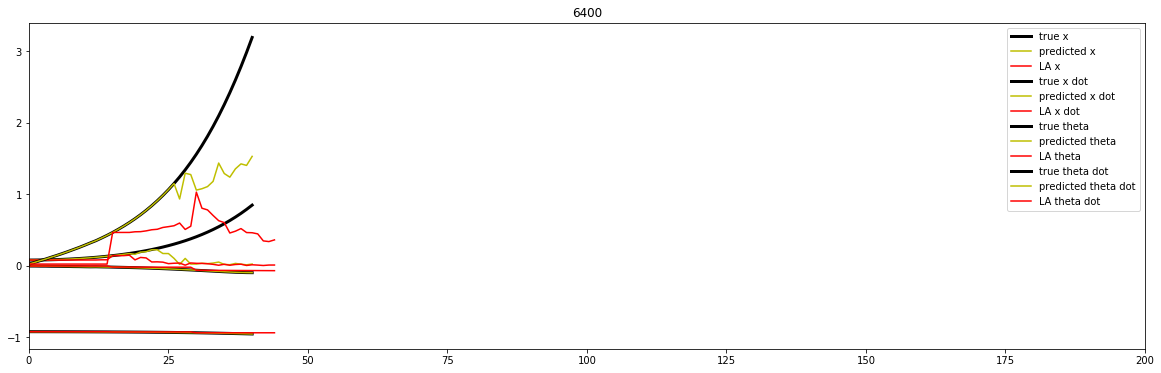

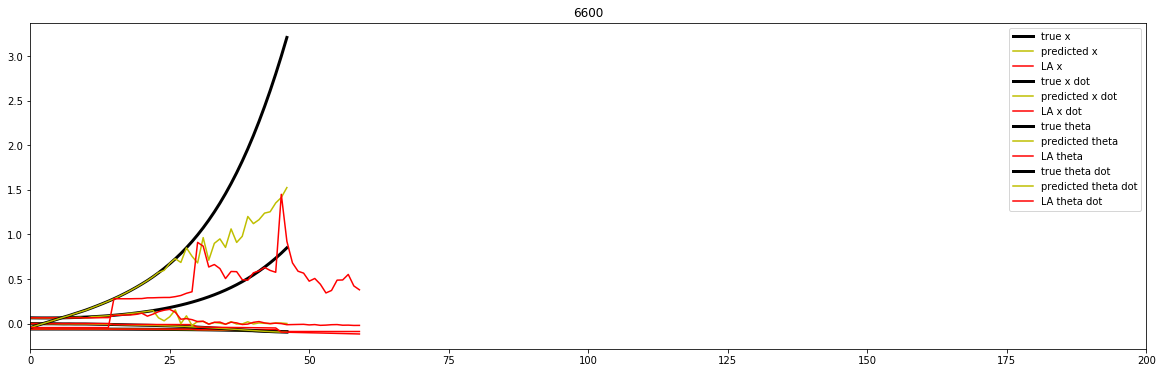

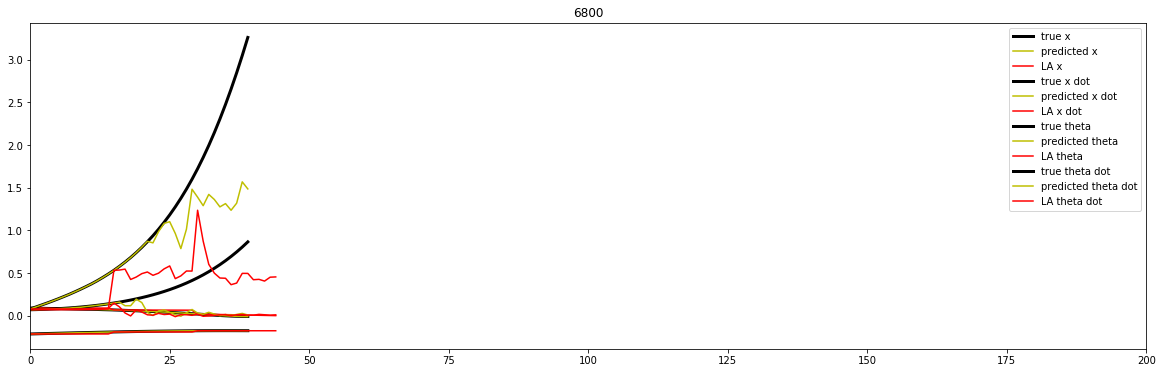

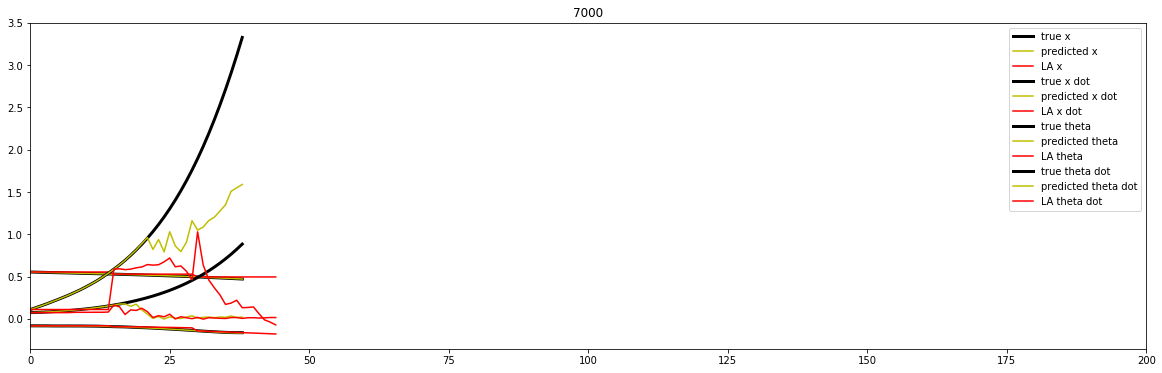

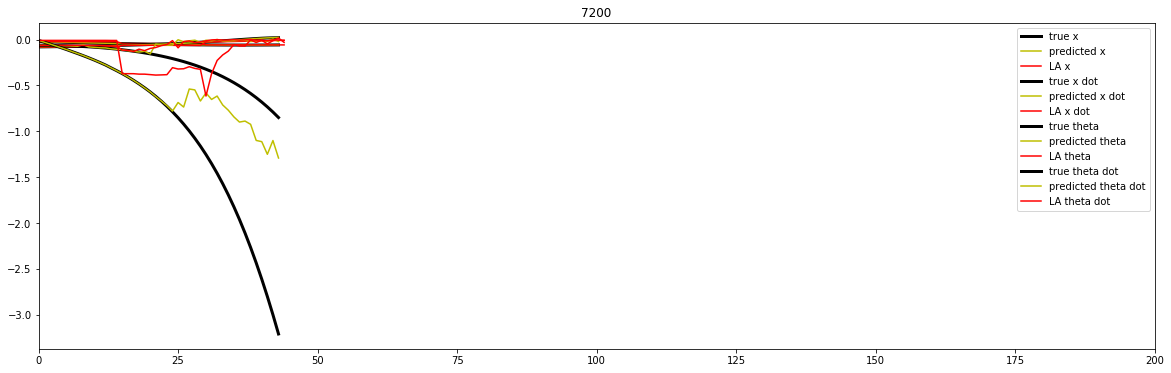

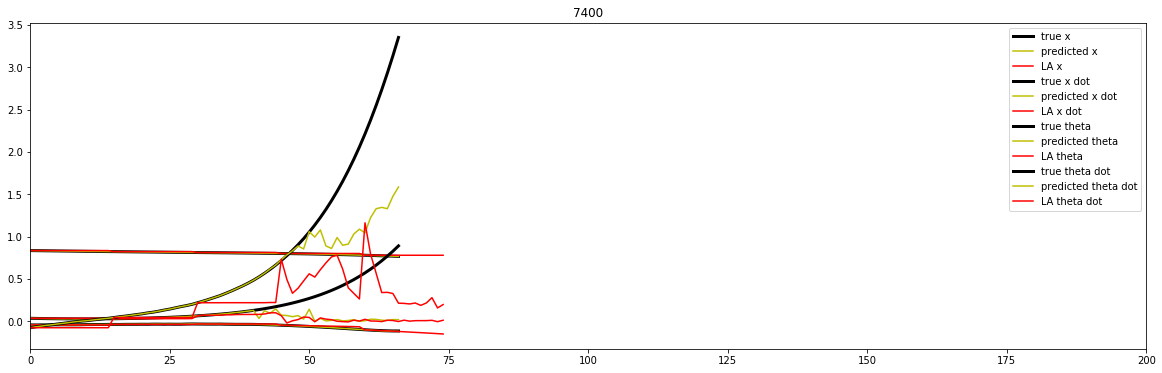

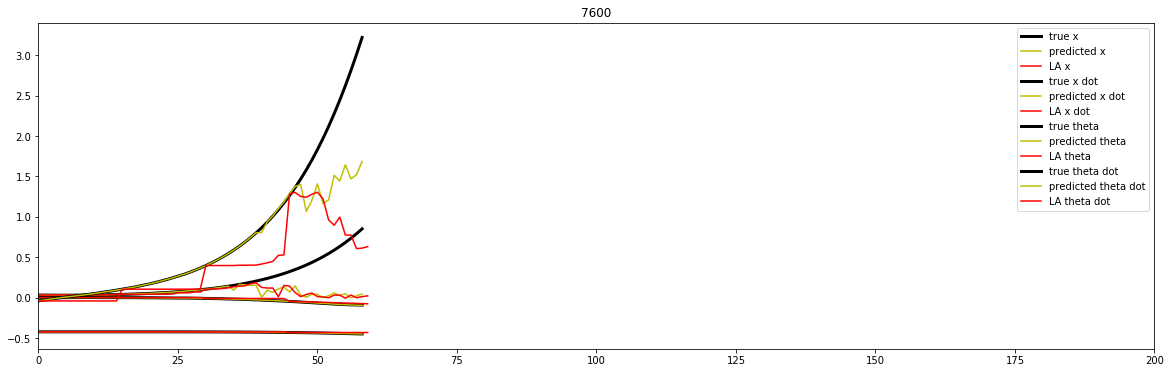

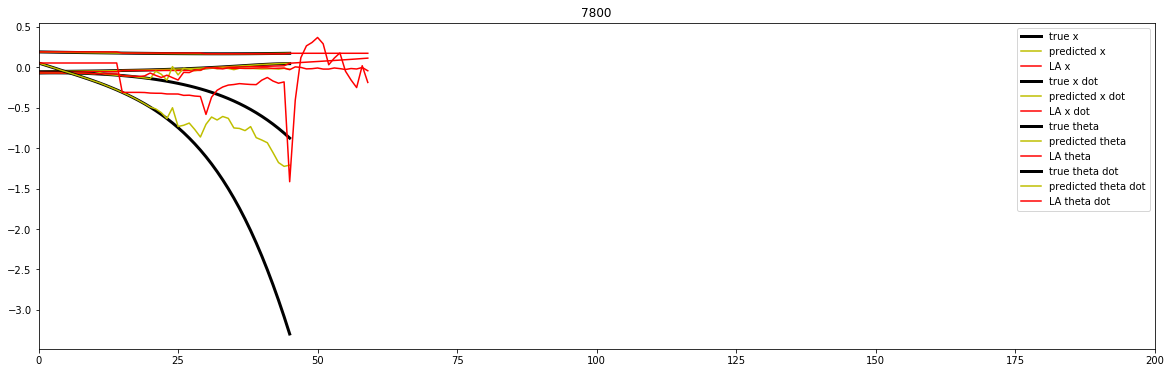

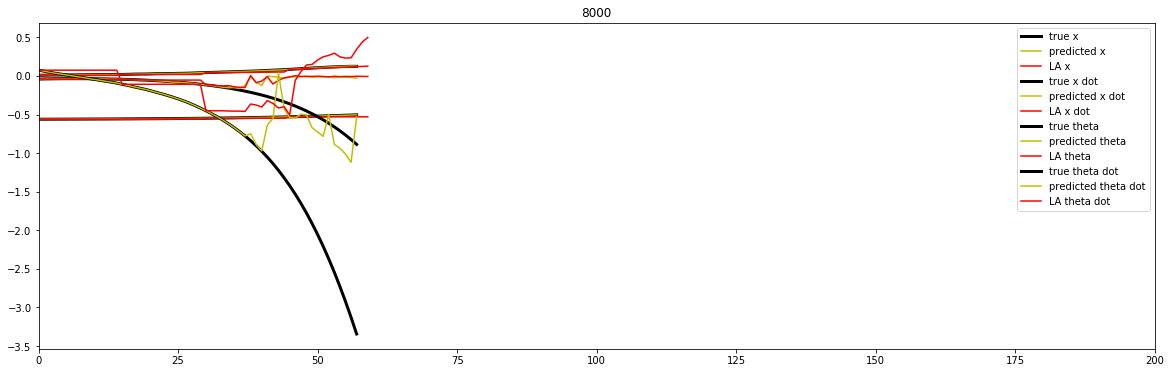

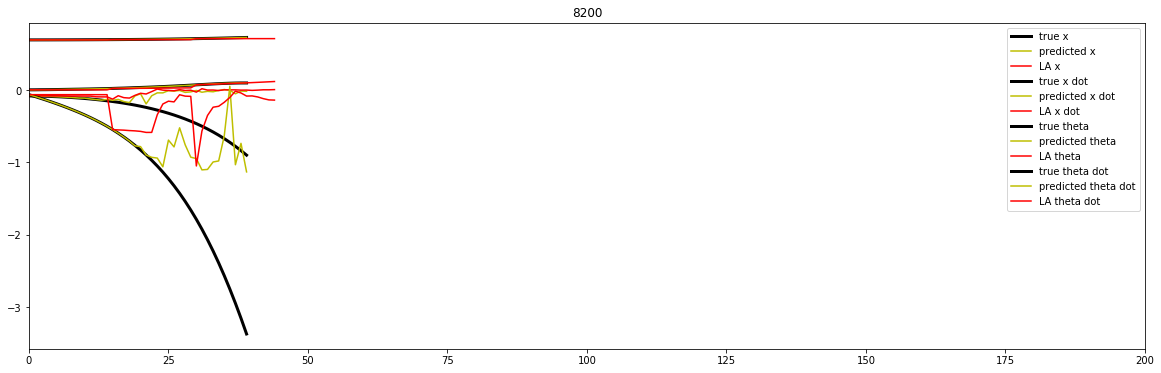

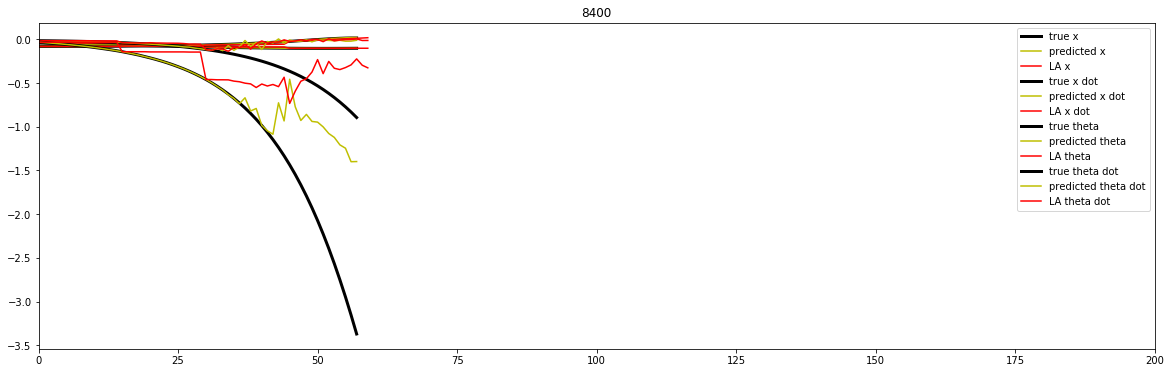

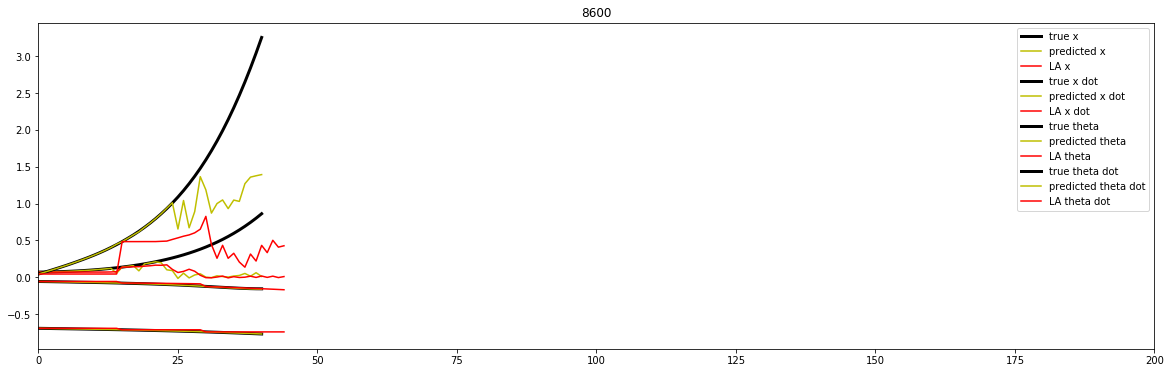

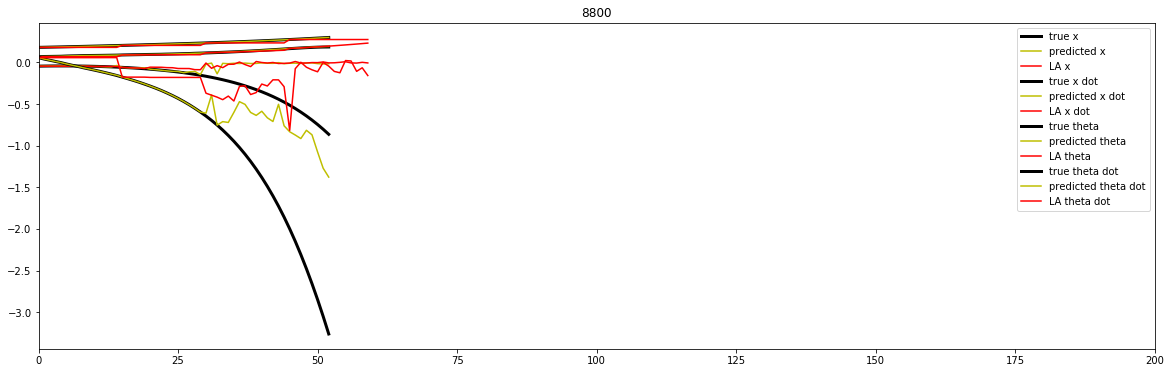

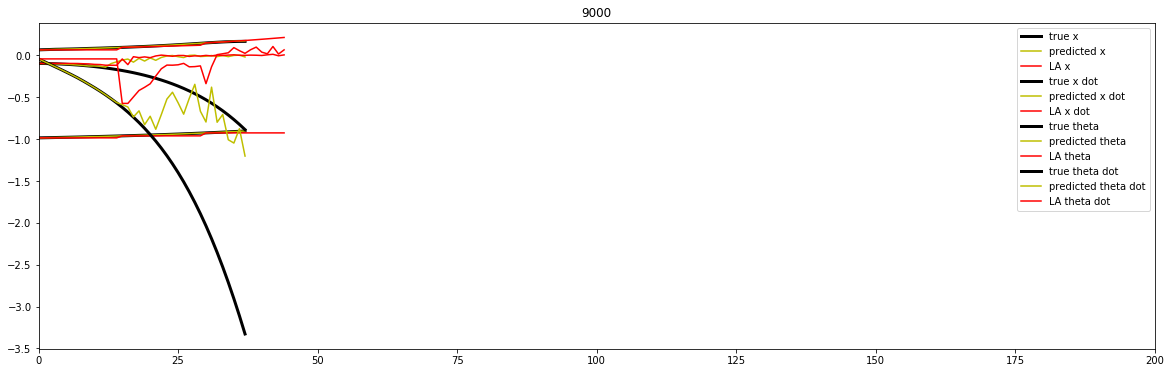

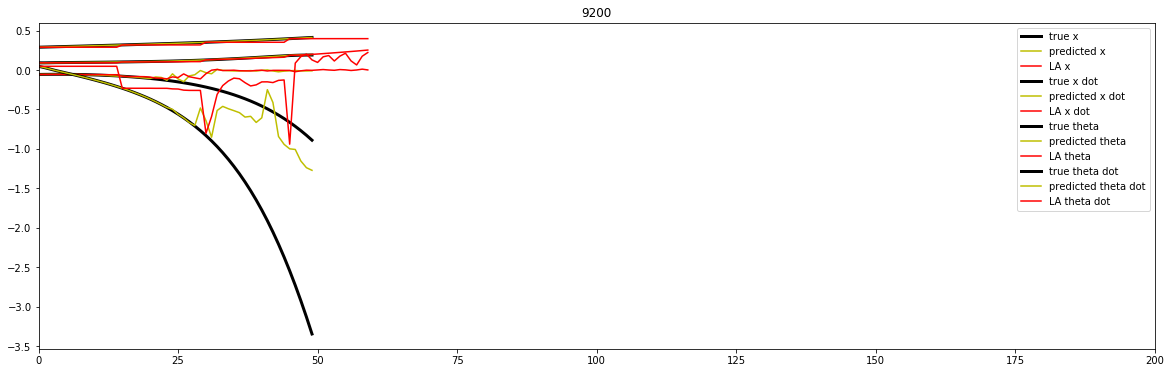

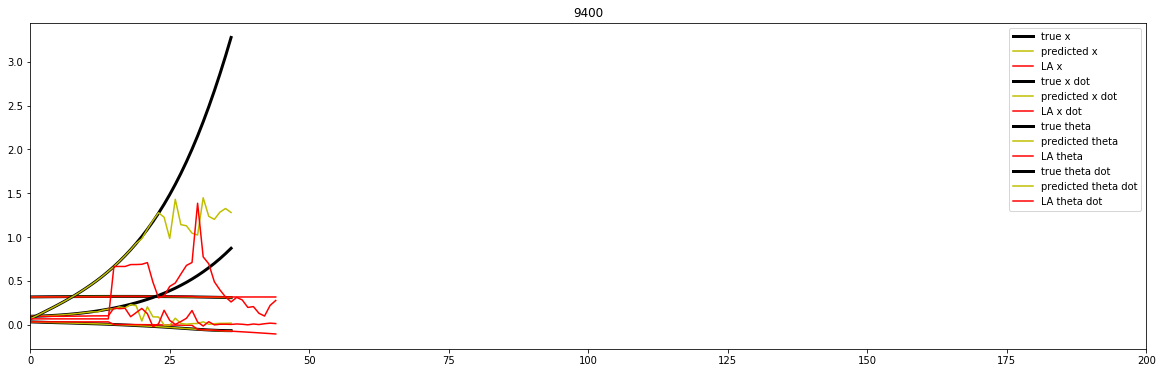

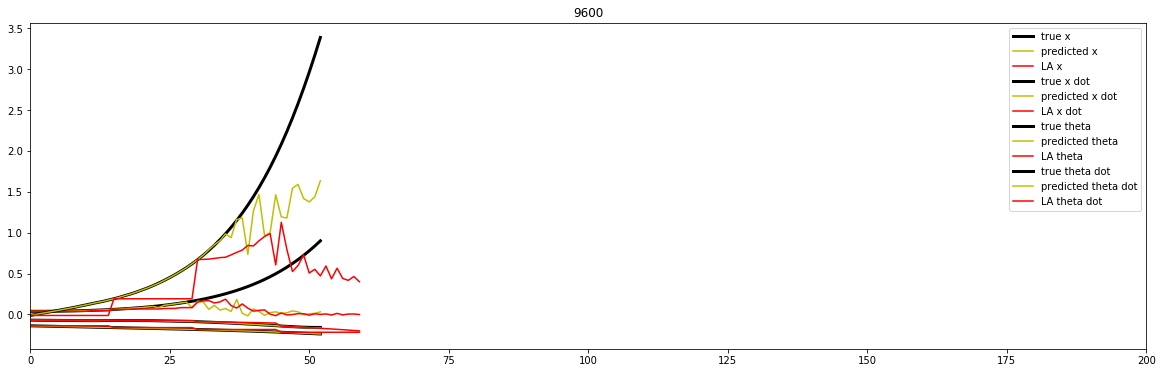

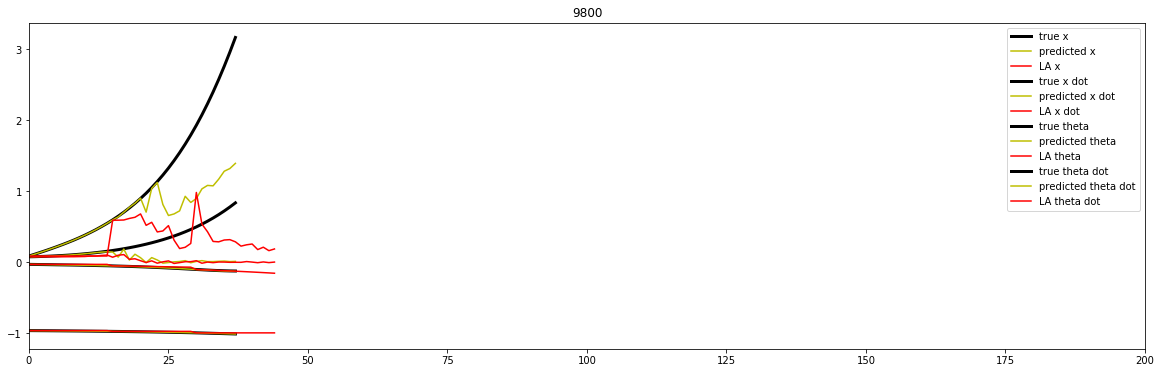

In [9]:
lookaheadlabels = ['LA x', 'LA x dot', 'LA theta', 'LA theta dot']
predictedlabels = ['predicted x', 'predicted x dot', 'predicted theta', 'predicted theta dot']
truelabels = ['true x','true x dot', 'true theta','true theta dot']
array_actual_trajectories = np.array(actual_trajectories)
for k in range(0,global_epoch,200):
    plt.figure(figsize=(20,6))
    for j in range(4):
        plt.plot(np.squeeze(np.array([array_actual_trajectories[k][j][i] for i in range(len(array_actual_trajectories[k][j]))])), label = truelabels[j], color = 'k',linewidth=3)
        plt.plot(predicted_trajectories[k].numpy()[j], label=predictedlabels[j], color = 'y')
        plt.plot(np.array(look_ahead_predictions[k]).T[j], label = lookaheadlabels[j], color = 'r')
#     plt.legend(['x', 'x dot','theta', 'theta dot', 'x', 'x dot','theta', 'theta dot'])
    plt.legend()
    plt.title(k)
    plt.xlim(0,200)
    plt.show()

## Not currently in use

array_squared_errors = np.array(squared_errors)
for i in range(0,split_model.global_epoch,25):
    f, ax = plt.subplots(figsize=(25,6))
    ax.plot(array_squared_errors[i][0], label='x')
    ax.plot(array_squared_errors[i][1],label='x dot')
    ax.plot(array_squared_errors[i][2], label = 'theta')
    ax.plot(array_squared_errors[i][3], label = 'theta dot')
    plt.title(i)
    ax.legend()
    ax.set_xlim([0.0,200])
    plt.show()